In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [58]:
ttnc=pd.read_csv('titanic_train.csv')

In [59]:
ttnc

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [60]:
ttnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [61]:
ttnc.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [62]:
ttnc.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [63]:
ttnc.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [64]:
ttnc.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
female_mask=ttnc[ttnc['Sex']=='female']['Age'].median()

In [66]:
ttnc.loc[(ttnc['Sex']=='female')& (ttnc['Age'].isnull()),'Age']= female_mask 

In [67]:
male_mask=ttnc[ttnc['Sex']=='male']['Age'].median()

In [68]:
ttnc.loc[(ttnc['Sex']=='male')& (ttnc['Age'].isnull()),'Age']= male_mask

In [69]:
ttnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
ttnc['Embarked'].fillna('S',inplace=True)

In [71]:
ttnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [72]:
ttnc.drop('Cabin',axis=1,inplace=True)

In [73]:
ttnc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


# Distribution passenger by gender and survival

In [74]:
ttnc.groupby('Sex').size()

Sex
female    314
male      577
dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

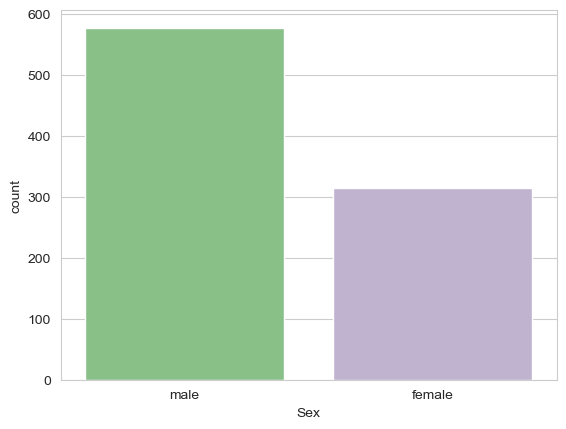

In [110]:
sns.set_style('whitegrid')
sns.countplot(x='Sex',data=ttnc,palette='Accent')

In [76]:
pd.pivot_table(ttnc, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [113]:
ttnc['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: title={'center': 'Distribution by gender'}>

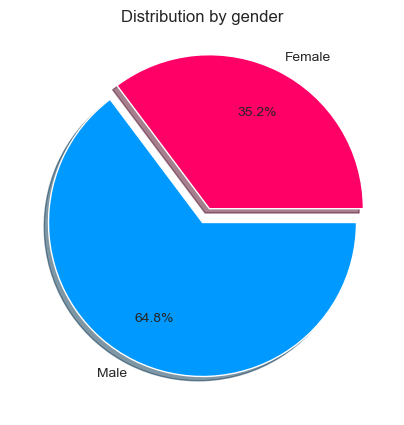

In [111]:
ttnc.groupby('Sex')['Survived'].count().plot.pie(colors=('#FF0066','#0099FF'),
                                                                 labels=('Female', 'Male'),
                                                                 autopct='%1.1f%%',
                                                                 pctdistance=0.7,
                                                                 shadow=True,
                                                                 explode=(0.1,0),
                                                                 figsize=(5,5),
                                                                 title='Distribution by gender',
                                                                 ylabel='')

<Axes: ylabel='Survived'>

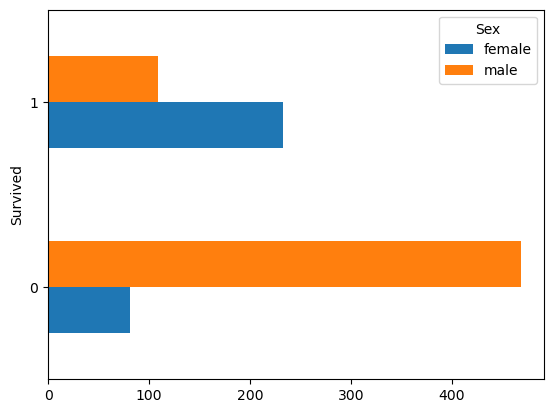

In [77]:
pd.pivot_table(ttnc, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count').plot.barh()

<Axes: xlabel='Survived', ylabel='Sex'>

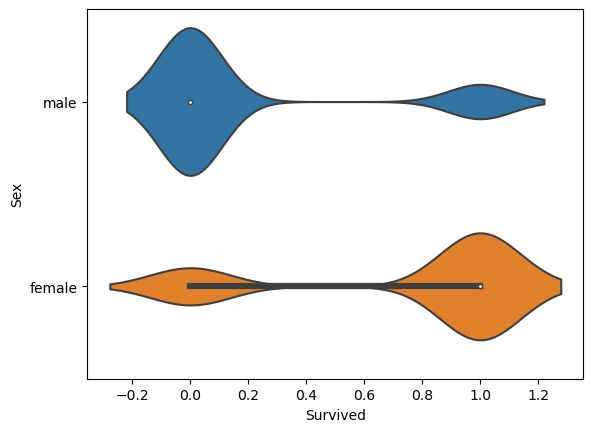

In [78]:
sns.violinplot(x='Survived',y='Sex',data=ttnc)

In [79]:
ttnc.groupby(['Sex'],as_index=False)['Survived'].mean() 

,Sex,Survived
0,female,0.742038
1,male,0.188908


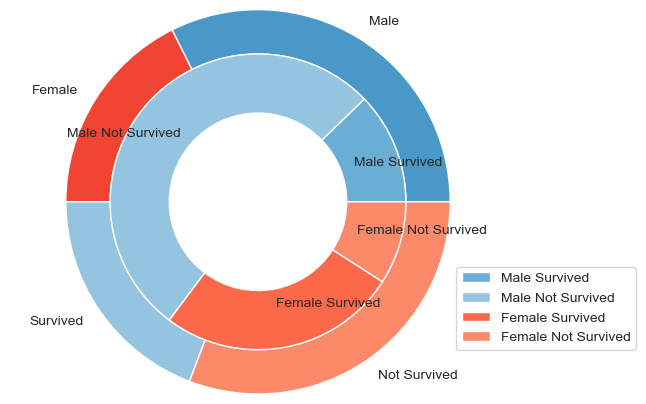

In [118]:
# Data for the Titanic dataset
group_names = ['Male', 'Female', 'Survived', 'Not Survived']
group_size = [
    len(ttnc[ttnc['Sex'] == 'male']),       # Number of male passengers
    len(ttnc[ttnc['Sex'] == 'female']),     # Number of female passengers
    len(ttnc[ttnc['Survived'] == 1]),       # Number of survived passengers
    len(ttnc[ttnc['Survived'] == 0])        # Number of not survived passengers
]

subgroup_names = ['Male Survived', 'Male Not Survived', 'Female Survived', 'Female Not Survived']
subgroup_size = [
    len(ttnc[(ttnc['Sex'] == 'male') & (ttnc['Survived'] == 1)]),       # Number of male passengers who survived
    len(ttnc[(ttnc['Sex'] == 'male') & (ttnc['Survived'] == 0)]),       # Number of male passengers who did not survive
    len(ttnc[(ttnc['Sex'] == 'female') & (ttnc['Survived'] == 1)]),     # Number of female passengers who survived
    len(ttnc[(ttnc['Sex'] == 'female') & (ttnc['Survived'] == 0)])      # Number of female passengers who did not survive
]

# Create colors
a, b = [plt.cm.Blues, plt.cm.Reds]

# First Ring (outside)
fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius=1.3, labels=group_names, colors=[a(0.6), b(0.6), a(0.4), b(0.4)])
plt.setp(mypie, width=0.3, edgecolor='white')

# Second Ring (Inside)
mypie2, _ = ax.pie(subgroup_size, radius=1.3-0.3, labels=subgroup_names, labeldistance=0.7, colors=[a(0.5), a(0.4), b(0.5), b(0.4)])
plt.setp(mypie2, width=0.4, edgecolor='white')
plt.margins(0, 0)

plt.legend(loc=(0.9, 0.1))
handles, labels = ax.get_legend_handles_labels()

ax.legend(handles[4:], subgroup_names, loc=(0.9, 0.1))
plt.show()

([<matplotlib.axis.XTick at 0x18d94a9cf50>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

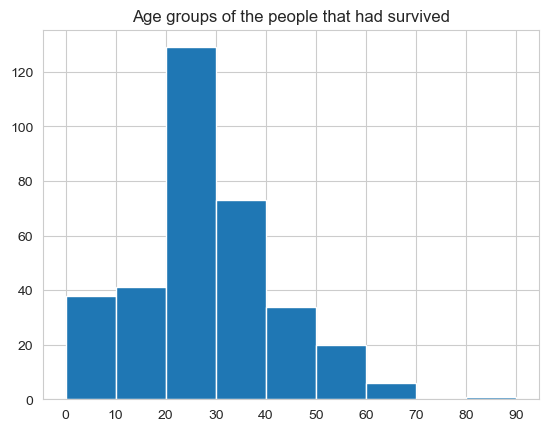

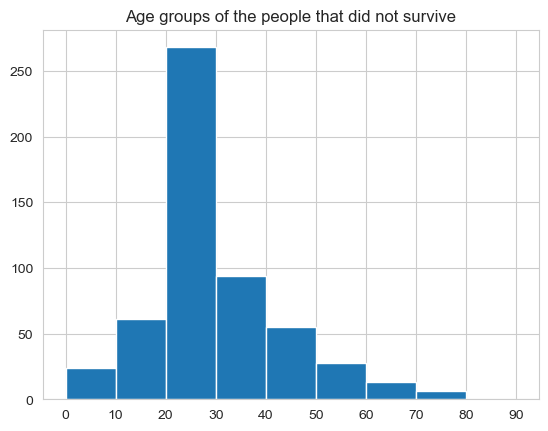

In [119]:
plt.figure(1)
age=ttnc.loc[ttnc.Survived==1,'Age']
plt.title('Age groups of the people that had survived')
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

plt.figure(2)
age=ttnc.loc[ttnc.Survived==0,'Age']
plt.title('Age groups of the people that did not survive')
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

<Axes: xlabel='Sex', ylabel='Age'>

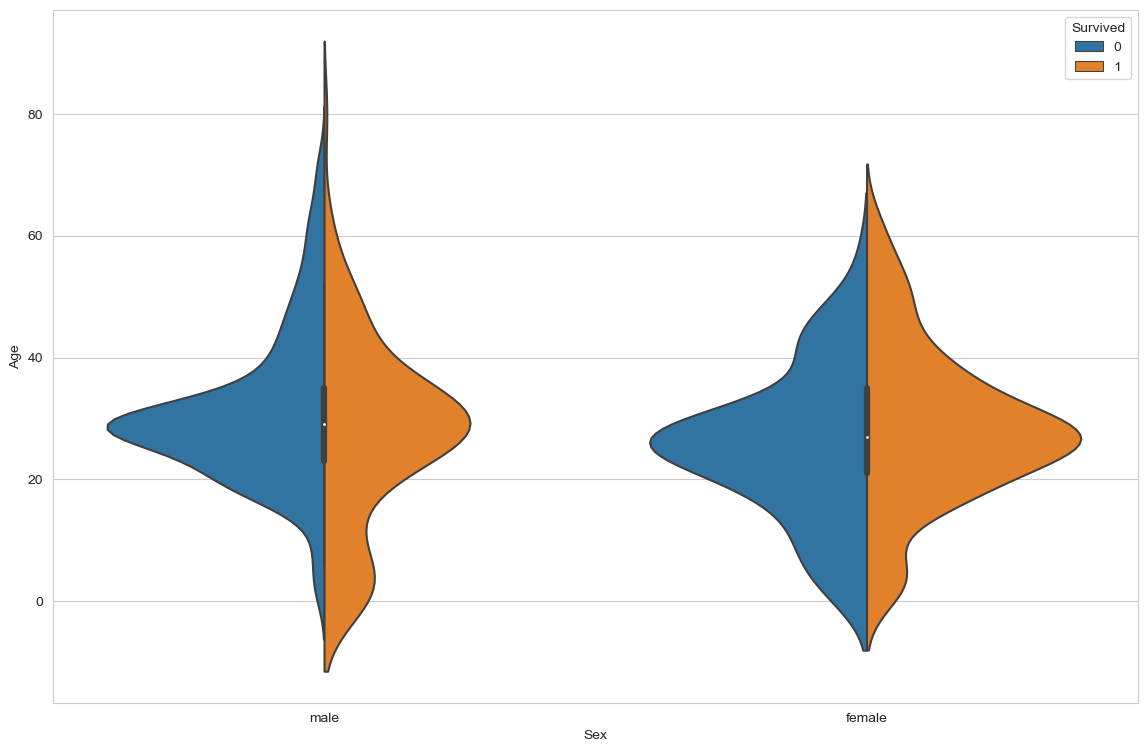

In [120]:
plt.figure(figsize=(14,9))
sns.violinplot(data=ttnc,
              x='Sex',
              y='Age',
              hue='Survived',
              split=True)

<Axes: xlabel='Pclass', ylabel='Survived'>

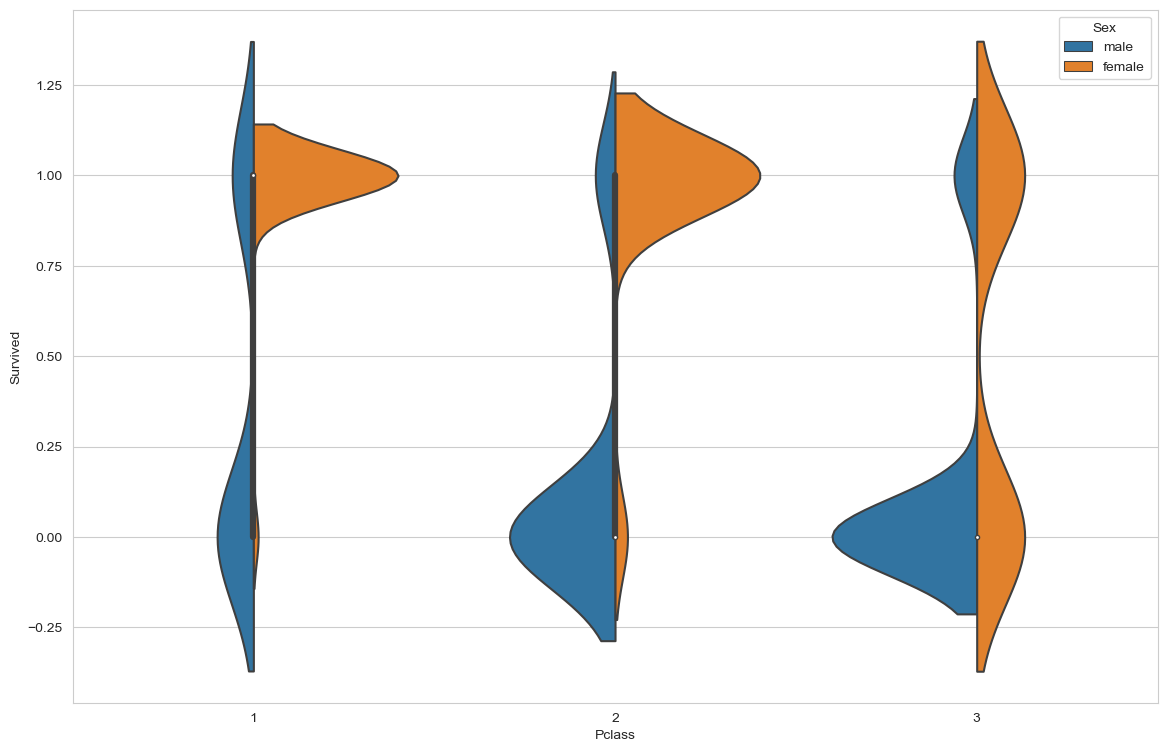

In [121]:
plt.figure(figsize=(14,9))
sns.violinplot(data=ttnc,
              x='Pclass',
              y='Survived',
              hue='Sex',
              split=True)

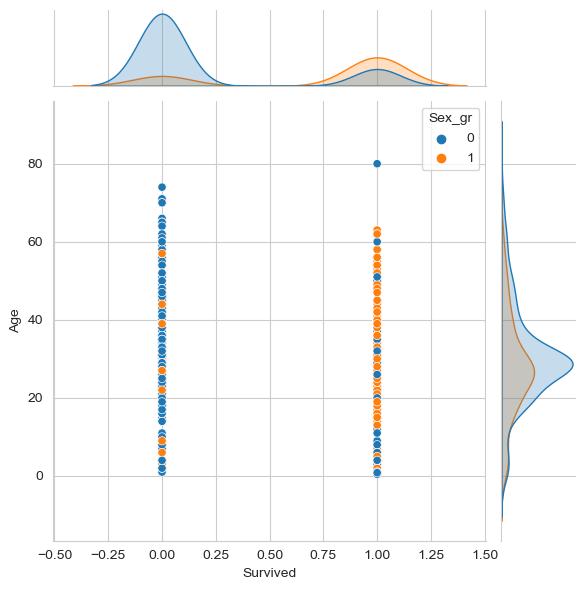

In [114]:
sns.jointplot(data=ttnc, x="Survived", y="Age", hue="Sex_gr")

#   displot chart to view the age distribution of passengers by age

C:\Users\maria\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


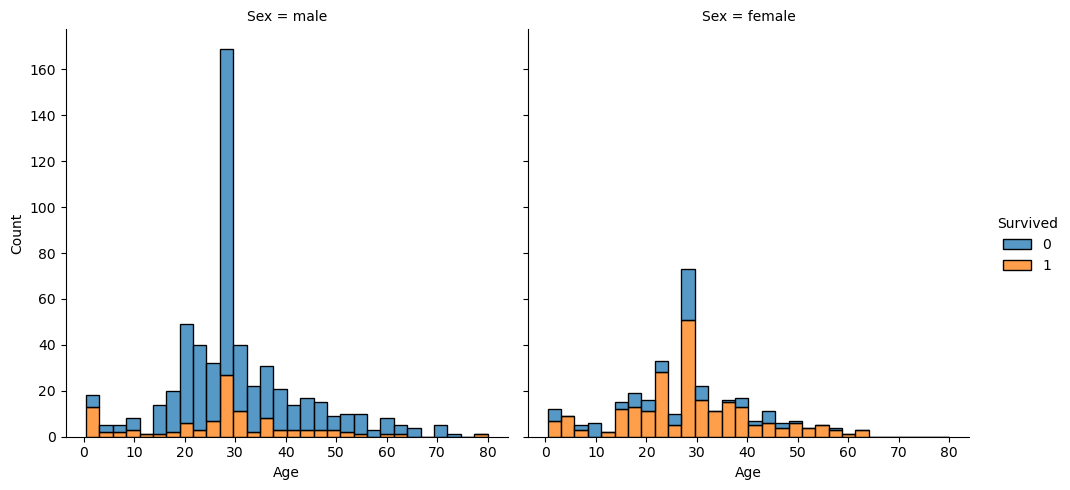

In [81]:
sns.displot(ttnc,
            x='Age',
          hue ='Survived',
           multiple='stack',
           col='Sex'        
           )

# Correlation matrix

In [116]:
ttnc_num=ttnc[['Age','SibSp','Parch','Fare_gr','Fare','Family_size','Pclass','Sex_gr','Survived']]


<Axes: >

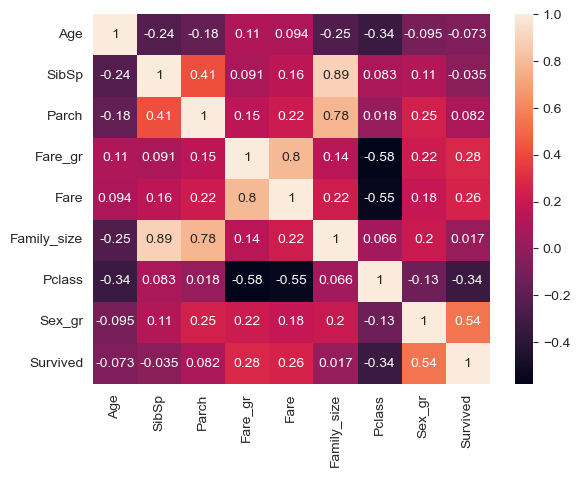

In [117]:
sns.heatmap(ttnc_num.corr(),annot=True)

# Pclass analysis

In [84]:
pd.pivot_table(ttnc, index = 'Pclass', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


<Axes: title={'center': 'Distribution by Class'}, ylabel='count'>

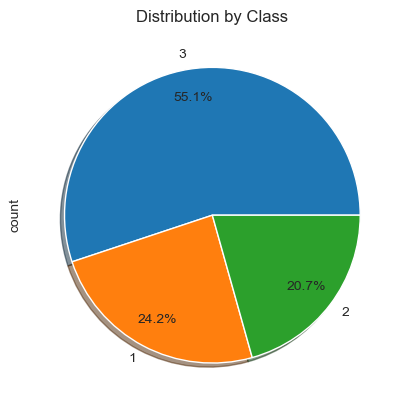

In [126]:
ttnc['Pclass'].value_counts().plot.pie(autopct='%1.1f%%',
                                          shadow=True,
                                          title='Distribution by Class',
                                          pctdistance=0.8)

<Axes: xlabel='Pclass'>

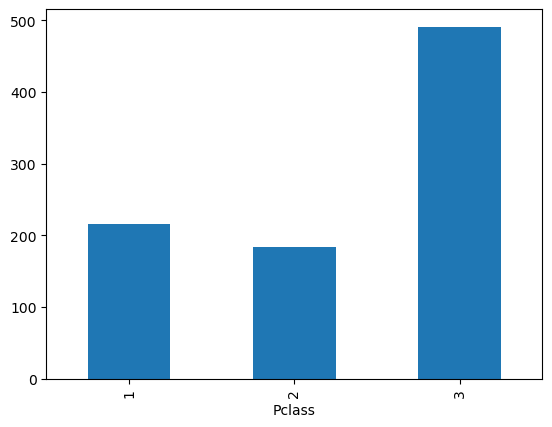

In [85]:
ttnc.groupby('Pclass').size().plot.bar()

In [86]:
pd.pivot_table(ttnc, index = 'Pclass', columns = ['Sex','Survived'],values = 'Ticket' ,aggfunc ='count')

Sex      female     male    
Survived      0   1    0   1
Pclass                      
1             3  91   77  45
2             6  70   91  17
3            72  72  300  47

<Axes: ylabel='Survived'>

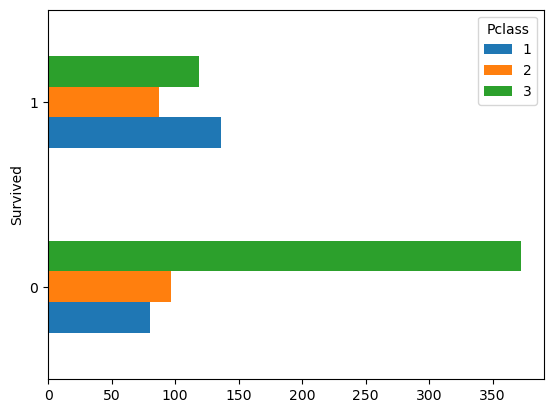

In [87]:
pd.pivot_table(ttnc, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count').plot.barh()

In [88]:
ttnc.groupby(['Pclass'],as_index=False)['Survived'].mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


# Embarked analysis

In [89]:
pd.pivot_table(ttnc, index = 'Embarked', columns = 'Sex', values = 'Survived' ,aggfunc ='count')

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,205,441


In [90]:
pd.pivot_table(ttnc, index = 'Embarked', columns = ['Sex','Survived'],values = 'Ticket' ,aggfunc ='count')

Sex      female      male    
Survived      0    1    0   1
Embarked                     
C             9   64   66  29
Q             9   27   38   3
S            63  142  364  77

<Axes: title={'center': 'Distribution by Embarkation point'}, ylabel='count'>

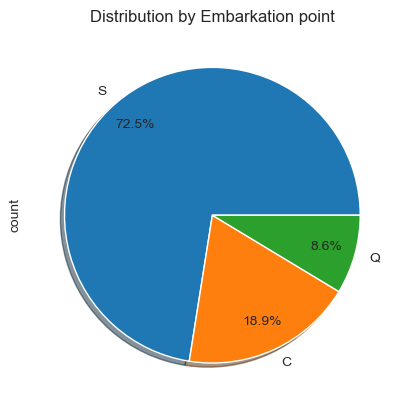

In [125]:
ttnc['Embarked'].value_counts().plot.pie(autopct='%1.1f%%',
                                            shadow=True,
                                             title='Distribution by Embarkation point',
                                       pctdistance=0.8)

<Axes: xlabel='Survived', ylabel='Embarked'>

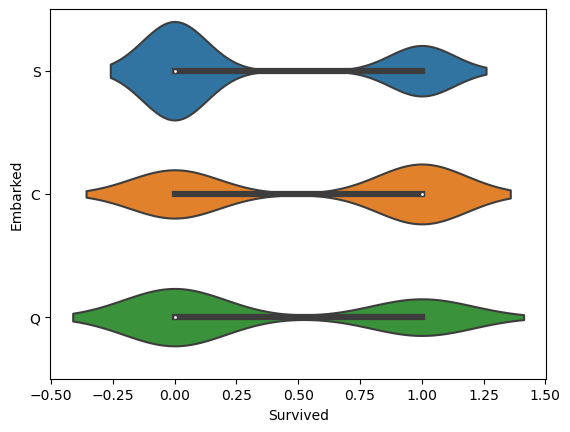

In [91]:
sns.violinplot(x='Survived',y='Embarked',data=ttnc)

<Axes: ylabel='Survived'>

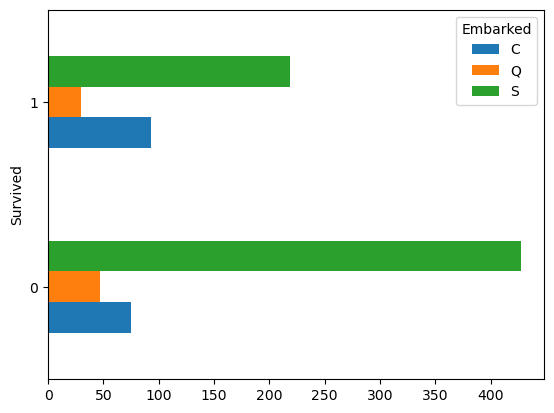

In [92]:
pd.pivot_table(ttnc, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count').plot.barh()

<Axes: xlabel='Embarked', ylabel='Family_size'>

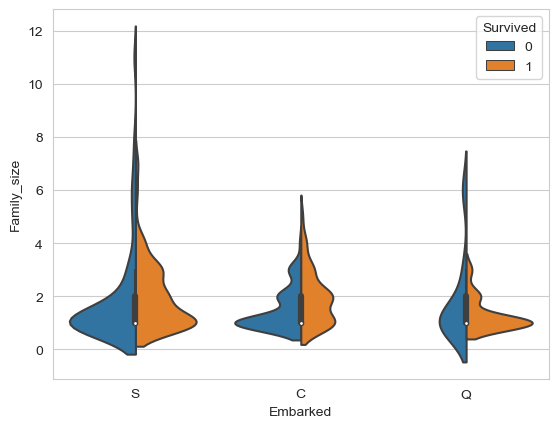

In [115]:
sns.violinplot(data=ttnc,
              x='Embarked',
              y='Family_size',
              hue='Survived',
              split=True)

In [94]:
ttnc.groupby(['Embarked'],as_index=False)['Survived'].mean()

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


# Family size analysis

<Axes: xlabel='SibSp', ylabel='count'>

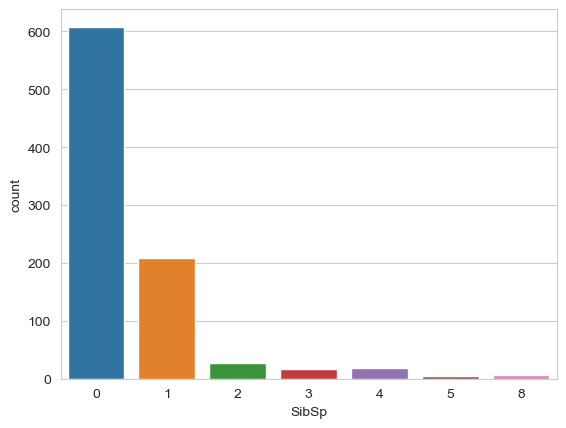

In [127]:
sns.countplot(x='SibSp',data=ttnc)

<Axes: xlabel='Parch', ylabel='count'>

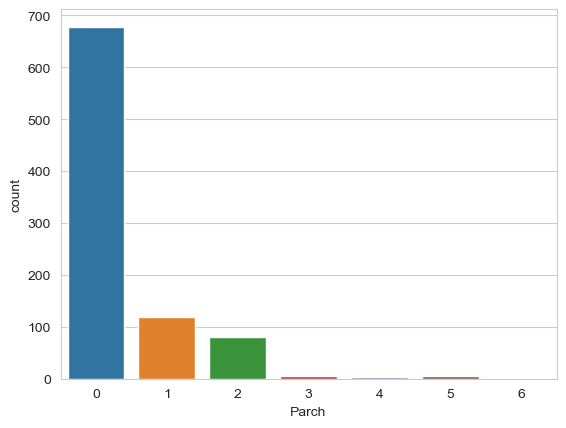

In [128]:
sns.countplot(x='Parch',data=ttnc)

In [95]:
ttnc['Family_size']=ttnc['SibSp']+ttnc['Parch']+1
ttnc.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1


In [96]:
ttnc.groupby(['Family_size'],as_index=False)['Survived'].mean()

,Family_size,Survived
0,1,0.303538
1,2,0.552795
2,3,0.578431
3,4,0.724138
4,5,0.200000
5,6,0.136364
6,7,0.333333
7,8,0.000000
8,11,0.000000


In [97]:
pd.pivot_table(ttnc, index = 'Family_size', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')

Sex,female,male
Family_size,,
1,126,411
2,87,74
3,49,53
4,19,10
5,12,3
6,8,14
7,8,4
8,2,4
11,3,4


In [98]:
pd.pivot_table(ttnc, index = 'Family_size', columns = ['Sex','Survived'], values = 'Ticket' ,aggfunc ='count')

Sex         female         male      
Survived         0     1      0     1
Family_size                          
1             27.0  99.0  347.0  64.0
2             16.0  71.0   56.0  18.0
3             11.0  38.0   32.0  21.0
4              3.0  16.0    5.0   5.0
5              9.0   3.0    3.0   NaN
6              5.0   3.0   14.0   NaN
7              5.0   3.0    3.0   1.0
8              2.0   NaN    4.0   NaN
11             3.0   NaN    4.0   NaN

<Axes: xlabel='Sex', ylabel='Family_size'>

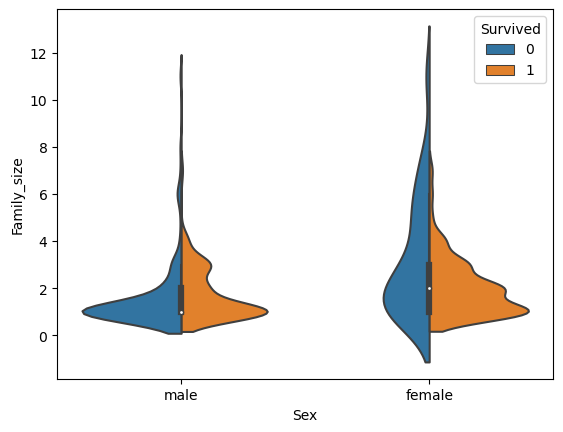

In [99]:
sns.violinplot(x='Sex',y='Family_size',hue='Survived',data=ttnc,split=True)

# Gender group

In [100]:
sex_map={'male':0, 'female':1}

In [101]:
ttnc['Sex_gr']=ttnc['Sex'].map(sex_map)
ttnc.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Sex_gr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0


In [102]:
ttnc.groupby(['Sex_gr'],as_index=False)['Survived'].mean()

,Sex_gr,Survived
0,0,0.188908
1,1,0.742038


# Fare Group

<Axes: >

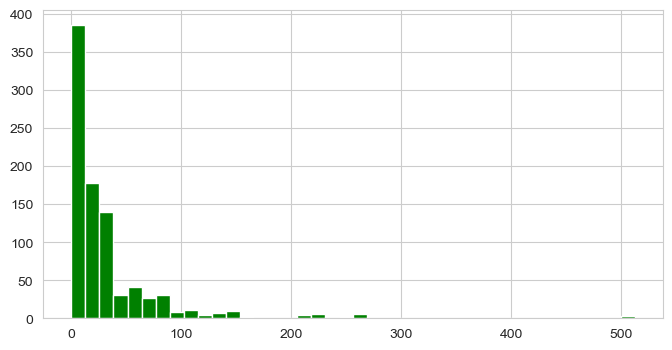

In [129]:
ttnc['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [104]:
ttnc['Fare_gr']=pd.qcut(ttnc['Fare'],10,
                       labels=['7.55','7.85','8.05','10.5','14.54','21.69','27','39.68','77.95','512.32'])
ttnc.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Sex_gr,Fare_gr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,7.55
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,1,77.95
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,8.05


In [105]:
ttnc.groupby(['Fare_gr'],as_index=False)['Survived'].mean()

,Fare_gr,Survived
0,7.55,0.141304
1,7.85,0.298851
2,8.05,0.179245
3,10.5,0.230769
4,14.54,0.428571
5,21.69,0.420455
6,27,0.516854
7,39.68,0.373626
8,77.95,0.528090
9,512.32,0.758621


# Age group

In [106]:
ttnc['Age_gr']=pd.qcut(ttnc['Age'],q=7,
             labels=['0-18','18-24','24-27','27-29','29-33','33-43','43-80'])   
ttnc.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Family_size,Sex_gr,Fare_gr,Age_gr
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,0,7.55,18-24
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,1,77.95,33-43
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,1,8.05,24-27


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

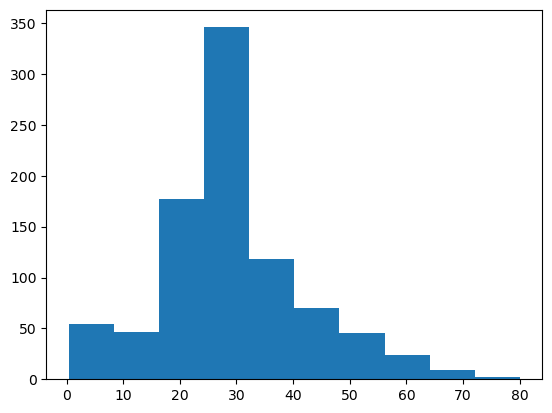

In [107]:
plt.hist(ttnc['Age'])

<Axes: >

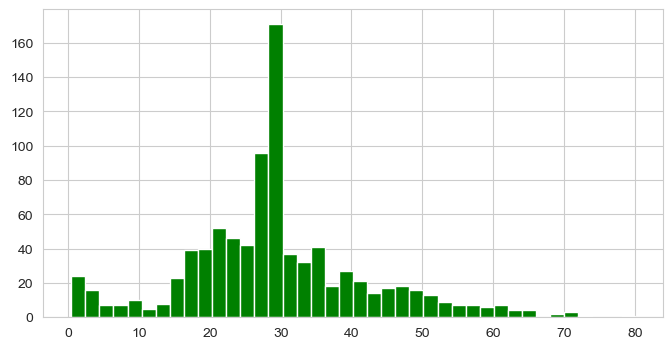

In [131]:
ttnc['Age'].hist(color='green',bins=40,figsize=(8,4))

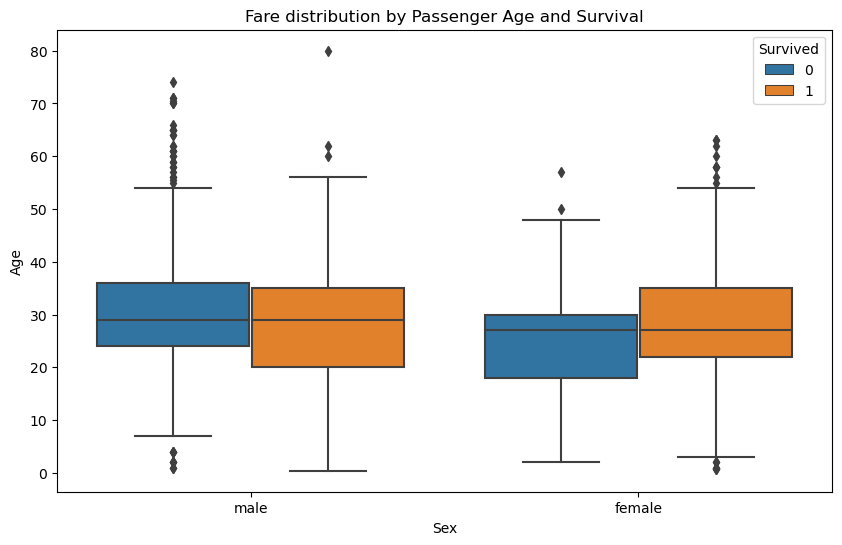

In [108]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ttnc, x='Sex', y='Age', hue='Survived')
plt.title('Fare distribution by Passenger Age and Survival')
plt.show()

In [109]:
ttnc.groupby(['Age_gr'],as_index=False)['Survived'].mean()

,Age_gr,Survived
0,0-18,0.503597
1,18-24,0.347826
2,24-27,0.522124
3,27-29,0.181287
4,29-33,0.430380
5,33-43,0.425197
6,43-80,0.370968
